<a href="https://colab.research.google.com/github/Hyunsooooo/Pytorch-/blob/main/Pytorch_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
#메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조를 가집니다.

In [ ]:
import torch.autograd
# 자동 미분을 위한 함수들이 포함
# 자동 미분의 on/off를 제어하는 콘텍스트 매니저나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'function등이 포함'

In [ ]:
import torch.nn
# 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의
# CNN, RNN, LSTM과 같은 레이어 ,ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수

In [ ]:
import torch.optim
# 확률적 경사 하강법(SGD) 를 중심으로 한
# 파라미터 최적화 알고리즘이 구현되어 있음

In [ ]:
import torch.utils.data
# SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어져 있습니다.

In [ ]:
import torch.onnx
# ONNX 의 포맷으로 모델을 export할 때 사용
# ONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷

## 텐서 조작하기

### 벡터, 행렬, 그리고 텐서

In [ ]:
# 2D Tensor 예시
# iris dataset

from sklearn.datasets import load_iris
# 기본적 머신러닝 라이브러리 사이킷런에서 iris data를 가져옵니다

iris = load_iris()
print(iris.data.shape) # row = 150, col = 5
iris['data'][:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

(1797, 8, 8)


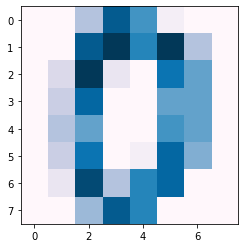

In [ ]:
# 3D Tensor 예시
# digits (mnist와 비슷함) dataset

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist['images'].shape)
plt.imshow(mnis['images'][0],cmap = 'PuBu')
plt.show()

In [ ]:
# 3D Tensor 예시

sentences = ['나는 사과를 좋아해','나는 바나나를 좋아해','나는 사과를 싫어해','나는 바나나를 싫어해']
word_sentences = [x.split(' ') for x in sentences]
print(word_sentences)

my_bow = {'나는':[0.1,0.2,0.9],'사과를':[0.3,0.5,0.1], '좋아해':[0.3,0.5,0.2], '바나나를':[0.7,0.6,0.5], '싫어해':[0.5,0.6,0.7]}
word2vec = [[my_bow[word] for word in sentence] for sentence in word_sentences]
print(word2vec)

[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.5, 0.6, 0.7]]]


### 넘파이로 텐서 만들기
Pytorch로 텐서를 만들어보기 전에 Numpy로 텐서를 만든다

In [ ]:
import numpy as np

In [ ]:
# Numpy로 1차원 벡터 만들기

t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [ ]:
print('Rank of t: ', t.ndim) #벡터의 차원
print('Shaple of t: ', t.shape) # 벡터의 크기

Rank of t:  1
Shaple of t:  (7,)


In [ ]:
print(f't[0] = {t[0]} , t[1] = {t[1]}, t[-1] = {t[-1]}')


t[0] = 0.0 , t[1] = 1.0, t[-1] = 6.0


In [ ]:
print(f't[2:5] = {t[2:5]}, t[4:-1] = {t[4:-1]}')

t[2:5] = [2. 3. 4.], t[4:-1] = [4. 5.]


## 텐서 조작하기

### View - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요
파이토치 텐서의 뷰는 넘파이에서의 reshape와 같은 역할을 합니다.
텐서의 크기를 변경해주는 역할을 합니다.

In [ ]:
t = np.array([[[0,1,2],
              [3,4,5]],
              [[6,7,8,],
               [9,10,11]]])
ft = torch.FloatTensor(t)

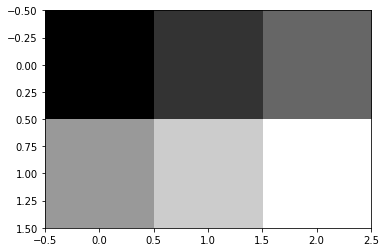

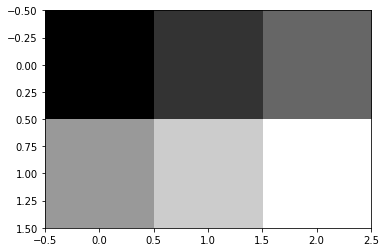

In [ ]:
for image in t:
  plt.imshow(image,cmap='gray')
  plt.show()

In [ ]:
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
# 3차원 텐서에서 2차원 텐서로 변경

In [ ]:
print(ft.view([-1,3]))
print(ft.view([-1,3]).shape)
# view([-1,3]) 이 가지는 의미 = -1은 첫번째 차원은 사용자가 모르겠으니 파이토치에 맡기겠다.
# 3은 두 번째 차원의 길이는 3을 가지도록
# (?,3)으로 변경하라는 의미, 결과적으로 4,3 을 가지게 됨

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
# 내부적으로 크기 변환은 다음과 같이 이루어짐 (2,2,3) -> (2x2, 3) ->(4,3)

# 1.view 는 기본적으로 변경 전과 후의 원소의 개수가 유지되어야 함
# 2.파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 그 값을 유추합니다.


In [ ]:
print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### Squeeze = 1인 차원을 제거한다.
스퀴즈는 차원이 1인 경우에는 해당 차원을 제거합니다.

In [ ]:
ft = torch.FloatTensor([[0],[1],[2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### Unsqueeze = 특정 위치에 1인 차원을 추가합니다
스퀴즈와 정반대

In [ ]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [ ]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape) # index 0 첫번째 차원에 1인 차원이 추가 (1,3)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.view(1,-1))
print(ft.view(1,-1).shape) # view 를 활용해서 추가하는 방법도 있음

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape) # (3,1)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape) # (3,1) 로 (1) 을 넣는 경우가 동일함 현재 텐서에서는.

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
# view(), squeeze(), unsqueeze() 는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절함

### Type Casting  아까보다 더 중요
텐서에는 자료형이라는 것이 있습니다. 각 데이터형별로 정의되어져 있는데, Ex) 32비트의 유동 소수점은 torch.FloatTensor , 64비트의 부호 있는 정수는 torch.LongTensor를 사용합니다. GPU 연산을 위한 자료형은 torch.cuda.FloatTensor
이 자료형을 변환하는 것을 Type Casting 이라 함

In [ ]:
# Long 타입의 lt 라는 텐서 생성

In [ ]:
lt = torch.LongTensor([1,2,3,4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
#텐서에다가 .float()을 붙이면 float형으로 타입이 바뀜

print(lt.float())

tensor([1., 2., 3., 4.])


In [ ]:
bt = torch.ByteTensor([True,False,False,True])
print(bt) # Byte 타입의 bt 라는 텐서

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [ ]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### concatenate
두 텐서를 연결하는 방법

In [ ]:
#2x2 크기의 텐서 두개 생성
x = torch.FloatTensor([[1,2],[3,4]])
y = torch.FloatTensor([[5,6], [7,8]])

In [ ]:
# 두 텐서를 torch.cat([])을 통해 연결한다. 어느 차원을 늘릴 것인지를 인자로 줄 수 있다.
# Ex ) dim = 0 은 index 0 의 차원을 늘리라는 의미임

print(torch.cat([x,y], dim =0)) # 2x2 , 2x2 -> 4x2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x,y], dim = 1)) # 2x2, 2x2 -> 2x4

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### Stacking
연결을 하는 또 다른 방법임. 영어로는 쌓는다는 의미.

In [ ]:
# 크기가 (2,) 인 3개의 벡터 생성

x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

In [ ]:
print(torch.stack([x,y,z])) # (3x2) 가 되었음.

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# 스택킹은 많은 연산을 축약한 것. 다음과 같다.

print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# 스태킹에도 dim를 인자로 줄 수 있다. 증가하는 차원을 정하는 것

print(torch.stack([x,y,z], dim = 1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### ones_like 와 zeros_like - 0 으로 채워진 텐서와 1로 채워진 텐서

In [ ]:
# (2x3) 텐서 생성

x = torch.FloatTensor([[0,1,2], [2,1,0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
#위 텐서에 ones_like 를 하면 동일한 크기의 1로 채워진 텐서 형성

print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### in-place operation 덮어쓰기 연산

In [ ]:
# 2x2 텐서를 생성

x = torch.FloatTensor([[1,2], [3,4]]) 

In [ ]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# 연산 뒤에 _ 를 붙여주면 기존의 값에 덮어쓴다.

print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


### 파이썬 class


In [ ]:
result = 0

In [ ]:
def add(num):
  global result #기존의 result 함수의 인자로 온 숫자를 더하고 return
  result += num
  return result

In [ ]:
print(add(3)) # 여기서 result 값이 3으로 갱신된다.
print(add(4))

3
7


In [ ]:
# 함수로 두 개의 덧셈기 구현하기

result1 = 0
result2 = 0

def add1(num):
  global result1
  result1 += num
  return result1

def add2(num):
  global result2
  result2 += num
  return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


In [ ]:
# 이러한 덧셈기를 class 로 만든다면?

class Calculator:
  def __init__(self):
    self.result = 0

  def add(self,num):
    self.result += num
    return self.result

cal1 = Calculator()

cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10
